In [18]:
import pandas as pd
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
ls data

categories.pkl    num_of_to_cart.pkl   session_item_cart_add.npz
df_features.pkl   num_of_view.pkl      session_item_view.npz
df_scores.pkl     PAB_cart.npz         session_order.npz
exploded_df.pkl   PAB_view.npz         similarities_cart_add.npz
exp_test.pkl      PB_cart.npy          similarities_view.npz
exp_train.pkl     PB_view.npy          top50.pkl
item_mapping.pkl  processed.json
num_of_order.pkl  reverse_mapping.pkl


In [20]:
df = pd.read_pickle("data/df_scores.pkl")

In [11]:
df.head()

,view,cart,order,w2vec_pred,cos_pred,top_pred
0,"[54712, 54714, 54719, 54720, 1892, 54723, 5472...","[54710, 54711, 54713, 54715, 7521, 54716, 5471...","[54715, 54718, 54711, 54726, 54724, 54716, 547...","[(699536, 0.9678006172180176), (1178128, 0.965...","[(349038, 0.5773502691896258), (936262, 0.5), ...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52..."
1,[547459],[1813284],[1813284],"[(827982, 0.8512779474258423), (369892, 0.8434...","[(547461, 0.35355339059327373), (547460, 0.353...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52..."
2,"[256659, 159628]",[],[461866],"[(256653, 0.8684725761413574), (256663, 0.8125...","[(256653, 0.3889222341312986), (816691, 0.3563...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52..."
3,"[21910, 5478]","[346854, 14767, 3080, 43047, 5477]","[5477, 3080, 14767, 346854, 43047]","[(49398, 0.9022839069366455), (49365, 0.895142...","[(694721, 0.7071067811865475), (694717, 0.4999...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52..."
4,"[370917, 370918]",[],[370918],[],"[(846754, 0.7071067811865475), (1377304, 0.707...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52..."


In [21]:
def avg_score(x):
    return np.mean([i[1] for i in x])
def sum_score(x):
    return sum(i[1] for i in x)

df['avg_w2vec'] = df['w2vec_pred'].apply(avg_score)
df['avg_cosine'] = df['cos_pred'].apply(avg_score)

df['sum_w2vec'] = df['w2vec_pred'].apply(sum_score)
df['sum_cosine'] = df['cos_pred'].apply(sum_score)

df['len_of_w2vec'] = df['w2vec_pred'].apply(lambda x: len(x))
df['len_of_cos'] = df['cos_pred'].apply(lambda x: len(x))
df['len_of_pred'] = df['len_of_cos']+df['len_of_w2vec']

df['ovr_pred'] = df['w2vec_pred'] + df['cos_pred']

df['mean_ovr'] = df['ovr_pred'].apply(avg_score)
df['sum_ovr'] = df['ovr_pred'].apply(sum_score)

/home/huvi/anaconda3/envs/ozon/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [23]:
df.head()

,view,cart,order,w2vec_pred,cos_pred,top_pred,avg_w2vec,avg_cosine,sum_w2vec,sum_cosine,len_of_w2vec,len_of_cos,len_of_pred,ovr_pred,mean_ovr,sum_ovr,intersection_w2vec,intersection_cosine
0,"[54712, 54714, 54719, 54720, 1892, 54723, 5472...","[54710, 54711, 54713, 54715, 7521, 54716, 5471...","[54715, 54718, 54711, 54726, 54724, 54716, 547...","[(699536, 0.9678006172180176), (1178128, 0.965...","[(349038, 0.5773502691896258), (936262, 0.5), ...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.944428,0.454887,47.221410,22.744328,50,50,100,"[(699536, 0.9678006172180176), (1178128, 0.965...",0.699657,69.965738,0,0
1,[547459],[1813284],[1813284],"[(827982, 0.8512779474258423), (369892, 0.8434...","[(547461, 0.35355339059327373), (547460, 0.353...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.803053,0.247118,40.152634,12.355924,50,50,100,"[(827982, 0.8512779474258423), (369892, 0.8434...",0.525086,52.508558,0,0
2,"[256659, 159628]",[],[461866],"[(256653, 0.8684725761413574), (256663, 0.8125...","[(256653, 0.3889222341312986), (816691, 0.3563...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.716076,0.258081,35.803780,12.904033,50,50,100,"[(256653, 0.8684725761413574), (256663, 0.8125...",0.487078,48.707814,0,0
3,"[21910, 5478]","[346854, 14767, 3080, 43047, 5477]","[5477, 3080, 14767, 346854, 43047]","[(49398, 0.9022839069366455), (49365, 0.895142...","[(694721, 0.7071067811865475), (694717, 0.4999...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.870689,0.172016,43.534465,8.600798,50,50,100,"[(49398, 0.9022839069366455), (49365, 0.895142...",0.521353,52.135262,0,0
4,"[370917, 370918]",[],[370918],[],"[(846754, 0.7071067811865475), (1377304, 0.707...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",NaN,0.480525,0.000000,3.844202,0,8,8,"[(846754, 0.7071067811865475), (1377304, 0.707...",0.480525,3.844202,0,0


In [22]:
top_pred = df.iloc[0, 5]
def intersection_with_top(x):
    return np.intersect1d(top_pred, x).shape[0]

df['intersection_w2vec'] = df['w2vec_pred'].apply(intersection_with_top)
df['intersection_cosine'] = df['cos_pred'].apply(intersection_with_top)

<AxesSubplot:>

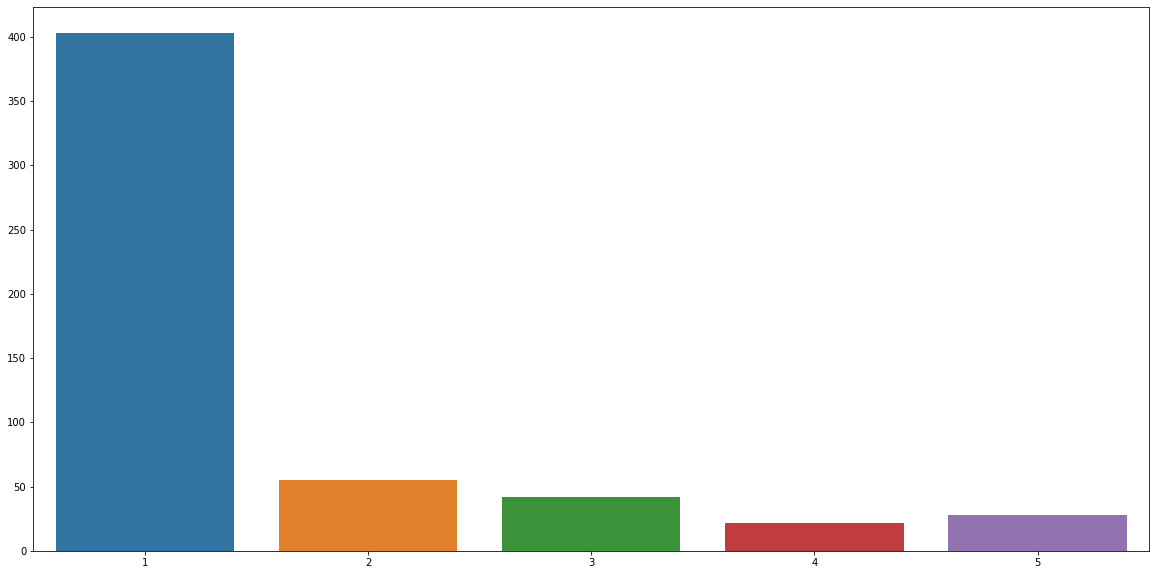

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
cntr = df['intersection_w2vec'].value_counts()
sns.barplot(x=cntr.index[1:], y=cntr.values[1:])

<AxesSubplot:>

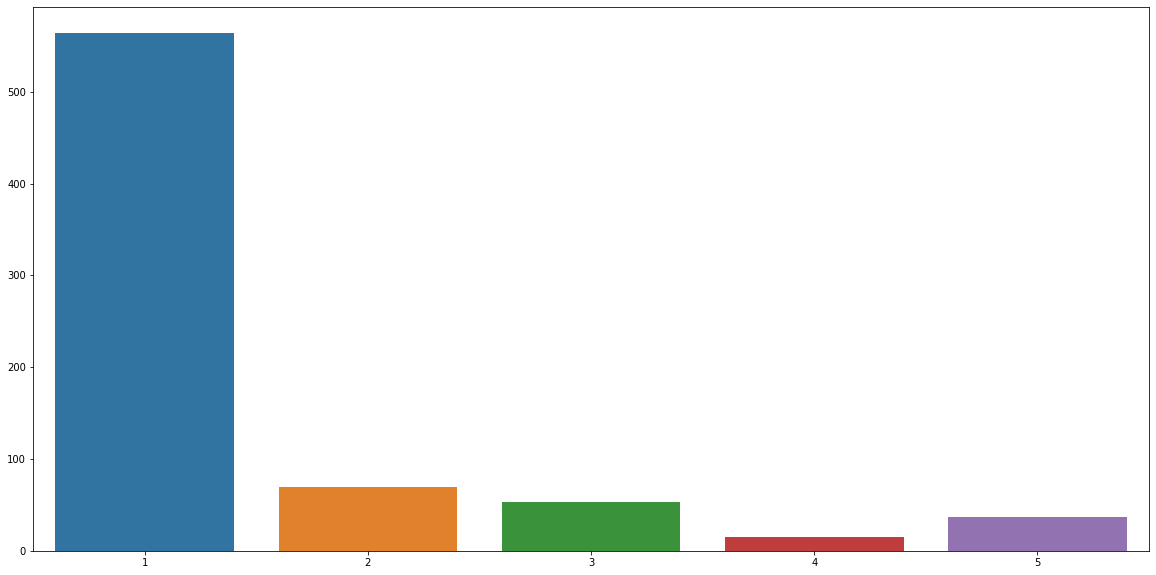

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
cntr = df['intersection_cosine'].value_counts()
sns.barplot(x=cntr.index[1:], y=cntr.values[1:])

<AxesSubplot:>

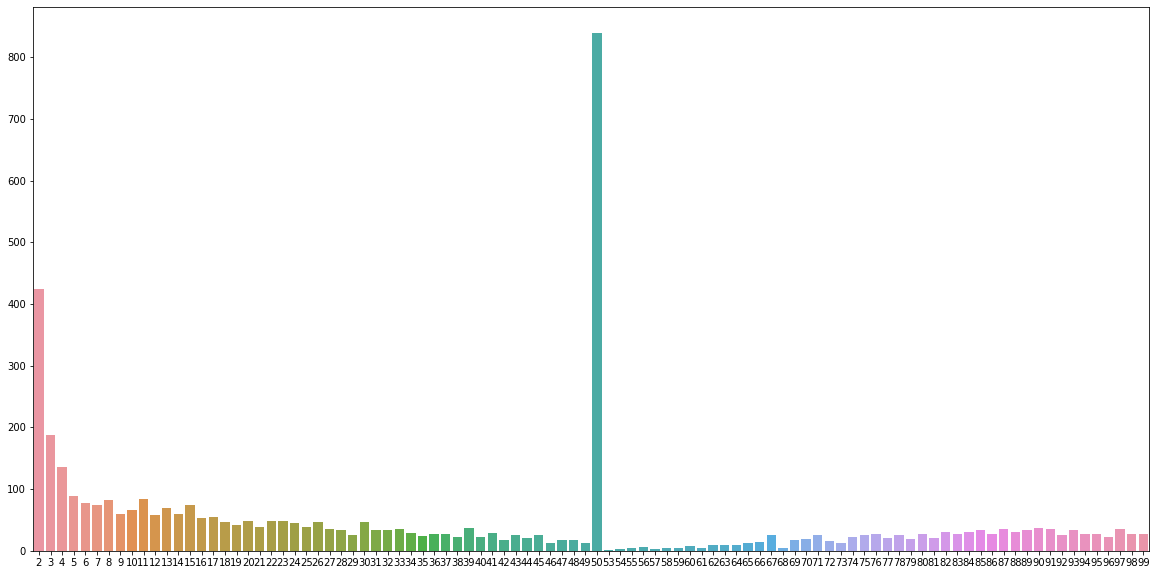

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
cntr = df['len_of_pred'].value_counts()
sns.barplot(x=cntr.index[1:], y=cntr.values[1:])

<AxesSubplot:>

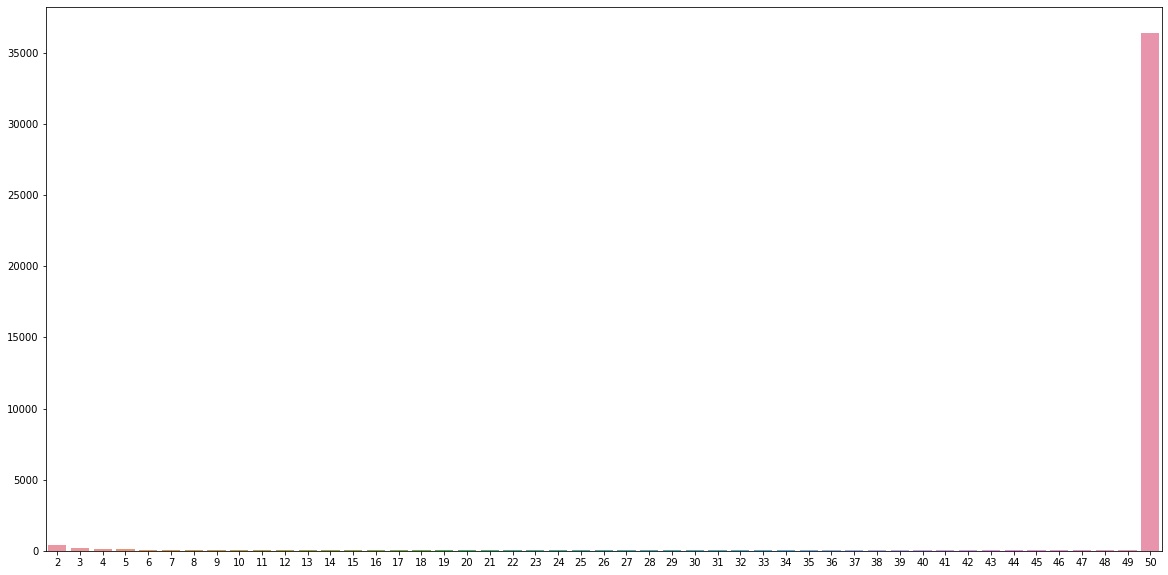

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
cntr = df['len_of_cos'].value_counts()
sns.barplot(x=cntr.index[:], y=cntr.values[:])

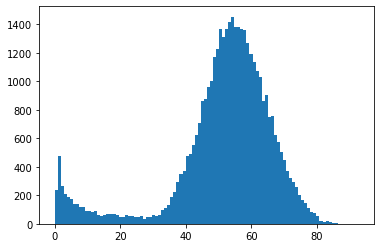

In [12]:
plt.hist(df['sum_ovr'], bins=100);

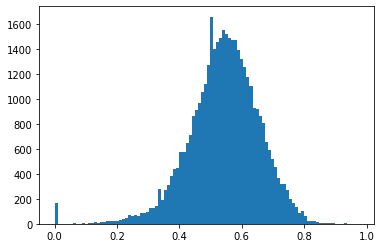

In [13]:
plt.hist(df['mean_ovr'], bins=100);

In [24]:
df['ovr_pred'] = df['w2vec_pred'] + df['cos_pred'] + df['top_pred']

In [25]:
df.head()

,view,cart,order,w2vec_pred,cos_pred,top_pred,avg_w2vec,avg_cosine,sum_w2vec,sum_cosine,len_of_w2vec,len_of_cos,len_of_pred,ovr_pred,mean_ovr,sum_ovr,intersection_w2vec,intersection_cosine
0,"[54712, 54714, 54719, 54720, 1892, 54723, 5472...","[54710, 54711, 54713, 54715, 7521, 54716, 5471...","[54715, 54718, 54711, 54726, 54724, 54716, 547...","[(699536, 0.9678006172180176), (1178128, 0.965...","[(349038, 0.5773502691896258), (936262, 0.5), ...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.944428,0.454887,47.221410,22.744328,50,50,100,"[(699536, 0.9678006172180176), (1178128, 0.965...",0.699657,69.965738,0,0
1,[547459],[1813284],[1813284],"[(827982, 0.8512779474258423), (369892, 0.8434...","[(547461, 0.35355339059327373), (547460, 0.353...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.803053,0.247118,40.152634,12.355924,50,50,100,"[(827982, 0.8512779474258423), (369892, 0.8434...",0.525086,52.508558,0,0
2,"[256659, 159628]",[],[461866],"[(256653, 0.8684725761413574), (256663, 0.8125...","[(256653, 0.3889222341312986), (816691, 0.3563...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.716076,0.258081,35.803780,12.904033,50,50,100,"[(256653, 0.8684725761413574), (256663, 0.8125...",0.487078,48.707814,0,0
3,"[21910, 5478]","[346854, 14767, 3080, 43047, 5477]","[5477, 3080, 14767, 346854, 43047]","[(49398, 0.9022839069366455), (49365, 0.895142...","[(694721, 0.7071067811865475), (694717, 0.4999...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",0.870689,0.172016,43.534465,8.600798,50,50,100,"[(49398, 0.9022839069366455), (49365, 0.895142...",0.521353,52.135262,0,0
4,"[370917, 370918]",[],[370918],[],"[(846754, 0.7071067811865475), (1377304, 0.707...","[54, 292, 13701, 1000, 65, 9761, 258, 2397, 52...",NaN,0.480525,0.000000,3.844202,0,8,8,"[(846754, 0.7071067811865475), (1377304, 0.707...",0.480525,3.844202,0,0


In [26]:
df.to_pickle("data/df_features.pkl")